# Symbolic Regression for GreyBody Factors(GBF)

## this section is for the GBF of Schwarzschild BH

### Load Dataset and Add Gaussian Noise
1. "import pysr" means Julia and Julia dependencies are installed; 
2. let's import all packages we need as well as the PySRRegressor

In [1]:
import pysr
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn. model_selection import train_test_split
from scipy import special
from scipy.special import erf, erfc

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


The dataset are conducted by numerical calculations@Marco. Regarding the Schwarzschild BH GBFs' $\Gamma_{lm}^s$, we consider four cases $(s=1, l=1/2/3/4)$, and ignore the $m$. (references see arXiv: 2409.02804; 2409.02807)

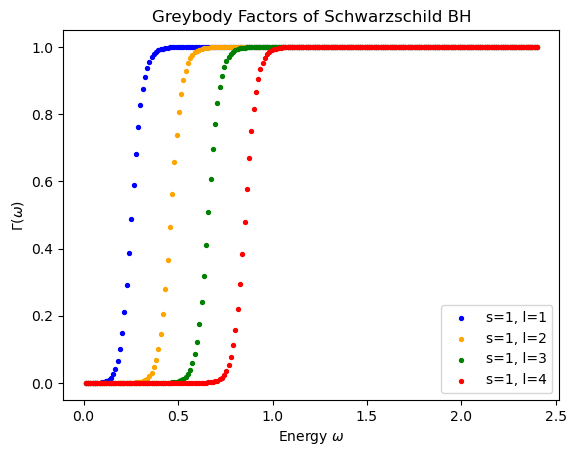

In [3]:
# Dataset
GBF_10_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=1.txt")
GBF_10_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=2.txt")
GBF_10_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=3.txt")
GBF_10_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=4.txt")
s10x, s10l0, s10l1, s10l2, s10l3 = GBF_10_10[:, 0], GBF_10_10[:, 1], GBF_10_20[:, 1], GBF_10_30[:, 1], GBF_10_40[:, 1]
np.savetxt("multispin/GBF_s=10.txt", np.c_[s10x, s10l0, s10l1, s10l2, s10l3])
s10_array = np.column_stack((s10l0, s10l1, s10l2, s10l3))

plt.scatter(s10x, s10l0, color= 'blue', s=8, label='s=1, l=1')
plt.scatter(s10x, s10l1, color= 'orange', s=8, label='s=1, l=2')
plt.scatter(s10x, s10l2, color= 'green', s=8, label='s=1, l=3')
plt.scatter(s10x, s10l3, color= 'red', s=8, label='s=1, l=4')

plt.xlabel("Energy $\omega$")
plt.ylabel("$\Gamma (\omega)$")
plt.title("Greybody Factors of Schwarzschild BH")
plt.legend()
plt.show()

Fitted parameters1: [   -3.55350828 -1434.14510794  1448.13682501]
Fitted parameters2: [   5.72232992   65.7006779  -102.49776384   87.63519384  -93.70034783]


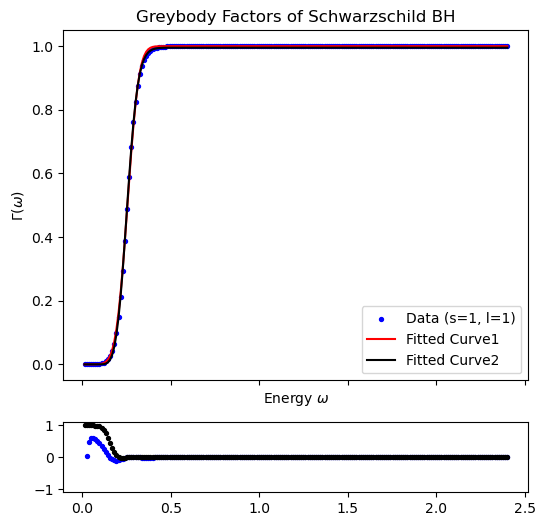

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Define the fitting function with combined variables
def fit_function00(xdata, a, b, c):
    x, y = xdata
    return 0.5 * (erf(a + b * y + c * x) + 1)

def fit_function01(xdata, a, b, c, d, e):
    x, y = xdata
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))

# Prepare data for curve_fit
xdata = (s10x, s10x)  # example where both inputs are x1 (adjust y input as needed)
# weights = 1.0 / (s10x + 0.01)  # Avoid zero weights for small x values
weights = np.exp(-s10x/0.2)

popt00, _ = curve_fit(fit_function00, xdata, s10l0, p0=[-3.5, -109.4, 116.5], sigma=weights)
popt01, _ = curve_fit(fit_function01, xdata, s10l0, p0=[5.8, -11.4, -1.9, 12.5, -6.1], sigma=weights)
print("Fitted parameters1:", popt00)
print("Fitted parameters2:", popt01)

fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s10x, s10l0, color='blue', s=8, label='Data (s=1, l=1)')
axs[0].plot(s10x, fit_function00(xdata, *popt00), color='red', label='Fitted Curve1')
axs[0].plot(s10x, fit_function01(xdata, *popt01), color='black', label='Fitted Curve2')
axs[1].scatter(s10x, (s10l0-fit_function00(xdata, *popt00))/s10l0, color='blue', s=8)
axs[1].scatter(s10x, (s10l0-fit_function01(xdata, *popt01))/s10l0, color='black', s=8)
axs[1].set_ylim(-1.1, 1.1)

axs[0].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()
plt.show()

To solve the over fitting in Symbolic Regression, a kind of Meachine Learning method, we have to define a Gaussian noise $\mathcal{N} (\mu=0, \sigma^2 = 0.02)$ and add it to numerical calculation results.

(200, 4) (200,)


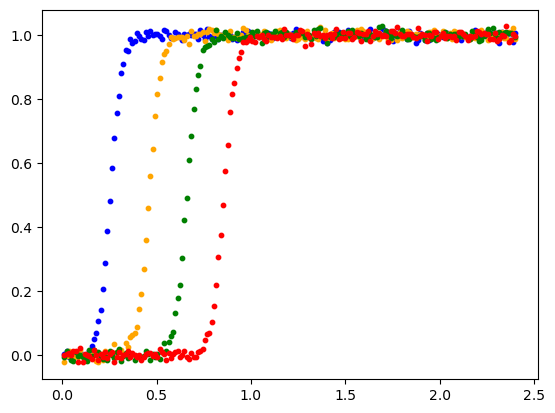

In [29]:
# Define Gaussian noise
mean = 0 
std_dev = 0.01
y1_noise = s10l0 + np.random.normal(mean, std_dev, size=s10l0.shape)
y2_noise = s10l1 + np.random.normal(mean, std_dev, size=s10l1.shape)
y3_noise = s10l2 + np.random.normal(mean, std_dev, size=s10l2.shape)
y4_noise = s10l3 + np.random.normal(mean, std_dev, size=s10l3.shape)

y_noise = np.column_stack((y1_noise, y2_noise, y3_noise, y4_noise)) # from (100, 1) to (100,4)
print(np.shape(y_noise), np.shape(y1_noise))

# plt.scatter(s10x, y_noise[:, 0], color='blue', marker='o', s=10)
plt.scatter(s10x, y1_noise, color='blue', marker='o', s=10)
plt.scatter(s10x, y2_noise, color='orange', marker='o', s=10)
plt.scatter(s10x, y3_noise, color='green', marker='o', s=10)
plt.scatter(s10x, y4_noise, color='red', marker='o', s=10)
plt.show()

### Manual Fit the universal formula
Marco guess a formula, which fits the datasets very well: $$\Gamma^{s=1}_{l} (\omega) =\frac{1}{2} [ {\rm erf}(\frac{\omega-0.4*(l-1) - 0.51}{0.15}) + 1]$$  We plot the datasets, formula and their residuals.

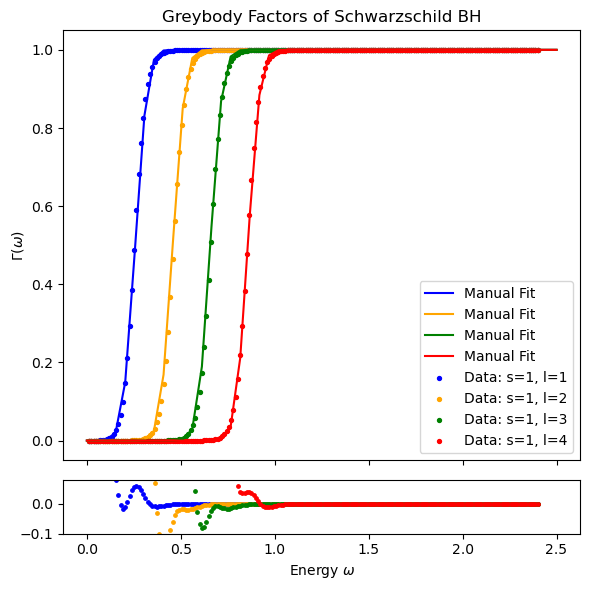

In [6]:
def ManualFit(x, l):
    a = 13.847 
    b = -2.770 
    c = -0.790
    return 0.5* (erf(a*x + b*l + c) + 1)


fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [8,1]})

xfit = np.linspace(0, 2.5)
axs[0].plot(xfit, ManualFit(xfit, 1), color='blue', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 2), color='orange', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 3), color='green', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 4), color='red', label='Manual Fit')

axs[0].scatter(s10x, s10l0, color= 'blue', s=8, label='Data: s=1, l=1')
axs[0].scatter(s10x, s10l1, color= 'orange', s=8, label='Data: s=1, l=2')
axs[0].scatter(s10x, s10l2, color= 'green', s=8, label='Data: s=1, l=3')
axs[0].scatter(s10x, s10l3, color= 'red', s=8, label='Data: s=1, l=4')

axs[1].scatter(s10x, ((s10l0-ManualFit(s10x, 1))/s10l0), color= 'blue', s=6)
axs[1].scatter(s10x, ((s10l1-ManualFit(s10x, 2))/s10l1), color= 'orange', s=6)
axs[1].scatter(s10x, ((s10l2-ManualFit(s10x, 3))/s10l2), color= 'green', s=6)
axs[1].scatter(s10x, ((s10l3-ManualFit(s10x, 4))/s10l3), color= 'red', s=6)
axs[1].set_ylim(-0.1, 0.08)

axs[1].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()

plt.tight_layout()
plt.show()

1. By default, PySR will set up 30 populations of expressions (which evolve independently except for migrations), use 4 threads, and use `"best"` for our model selection strategy. 
2. PySR can run for arbitrarily long, and continue to find more and more accurate expressions. We can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

$\underline{Operators}$: 
1. Pretty much any valid Julia function which takes one or two scalars as input, and returns on scalar as output, is likely to be a valid operator. PySR has a series of predefined valid operators. 
2. Additionally, instead of passing a predefined operators as a string, we can also define a $\underline{Custom}$ function as Julia code:

In [229]:
# PySRRegressor(
#     ...,
#     unary_operators=["myfunction(x) = x^2"],
#     binary_operators=["myotherfunctions(x, y) = x^2*y"],
#     extra_sympy_mappings={
#         "myfunction": lambda x: x**2,
#         "myotherfunction": lambda x, y: x**2 * y,
#     }
# )

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**
1. In mathematics, the error function (also called the Gauss error function), often denoted by $\underline{erf}$, defined as:
$${\rm erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2}dt $$
2. Erfc is the complementary error function, commonly denoted erfc(z), defined by:
$${\rm erfc}(z)\equiv 1-{\rm erf}(z) = \frac{2}{\sqrt{\pi}} \int_z^{\infty} e^{-t^2} dt $$

### One Variable Function $f(x_i)$
Here, we fit one line firstly

In [7]:
# Learn equation
# We have define a Custom Complexities for model.
X = s10x.reshape(-1, 1)
model = PySRRegressor(niterations = 50, 
                      populations = 50,
                      binary_operators=["+", "-", "*", "/"],
                      unary_operators=["sin", "cos", "exp", "log", "erf", "erfc"],
                      complexity_of_operators={  # set custom complexities
                          "+": 1,
                          "-": 1,
                          "*": 2,
                          "/": 2,
                          "sin": 3, 
                          "cos": 3,
                          "exp": 3,
                          "log": 3,
                          "erf": 4,
                          "erfc": 4,
                          },
                      )

model.fit(X, y1_noise)

/Users/yuangw/anaconda3/lib/python3.11/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 6.600e+05
Head worker occupation: 10.8%
Progress: 1550 / 2500 total iterations (62.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e-01  1.594e+01  y = 0.71901
3           8.113e-02  1.575e-01  y = 0.5039 + 0.3884
4           6.468e-02  2.266e-01  y = sin(x₀)
5           4.996e-02  2.582e-01  y = erf(x₀)
6           3.688e-02  3.034e-01  y = sin(x₀) + 0.16671
7           1.129e-02  1.183e+00  y = erf(x₀ + x₀)
8           1.047e-02  7.612e-02  y = erf(2.2746 * x₀)
10          5.564e-03  3.160e-01  y = erf((x₀ / 0.29166) + -0.32298)
11          3.039e-03  6.049e-01  y = erf(x₀ * (x₀ / 0.12543))
13          9.039e-04  6.062e-01  y = erf((x₀ / 0.058317) * (x₀ + -0.14043))
15          6.595e-04  1.576e-01  y = erf((-0.14517 + x₀) * ((x₀ / 0.049659) - 0.702))
16          3.878e-04  5.310e-01  y = erf((x₀ + -0.14448) * ((x₀ / 0.0

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.96455634   
	1         0.031179                             0.5039028 + 0.38840297   
	2         0.226639                                            sin(x0)   
	3         0.258192                                            erf(x0)   
	4         0.303424                               sin(x0) + 0.16671132   
	5         1.183447                                       erf(x0 + x0)   
	6         0.076115                                erf(2.2746336 * x0)   
	7         0.315997               erf((x0 / 0.29166335) + -0.32297856)   
	8         0.604865                         erf(x0 * (x0 / 0.1254267))   
	9         0.606228         erf((x0 / 0.05831695) * (x0 + -0.1404304))   
	10        0.170305  erf((-0.14693382 + x0) * (-0.8038954 + (x0 / 0...   
	11  >>>>  0.508811  erf((-0.14532577 + x0) * (x0 * (x0 / 0.0149060...   
	12        0.018778  erf((-0.14505748 + x0) * (((x0 / 0.013503088) ...   
	13        0.042248  -0.0057224045 + erf(x0 * ((((x0 + -0.20406194)...   
	
	        loss  complexity  
	0   0.086350           1  
	1   0.081130           3  
	2   0.064677           4  
	3   0.049960           5  
	4   0.036885           6  
	5   0.011295           7  
	6   0.010467           8  
	7   0.005564          10  
	8   0.003039          11  
	9   0.000904          13  
	10  0.000643          15  
	11  0.000387          16  
	12  0.000372          18  
	13  0.000342          20  
]

We can print the model by "model", which will print out all the discovered expressions. 
And we can also view the SymPy format of the best expression:

In [8]:
model.sympy()

erf(x0*x0*(x0 - 0.14532577)/0.014906053)

Let's compare the formula getted by PySR with the dataset.
$$\Gamma_{l=1}^{s=1} = {\rm erfc} ({\rm erfc} (\frac{\omega - 0.531}{0.184} +0.629) ) $$
$$\Gamma_{l=1}^{s=1} = {\rm erf} (\frac{\omega_0^2*(\omega_0 - 0.284)}{0.121})$$

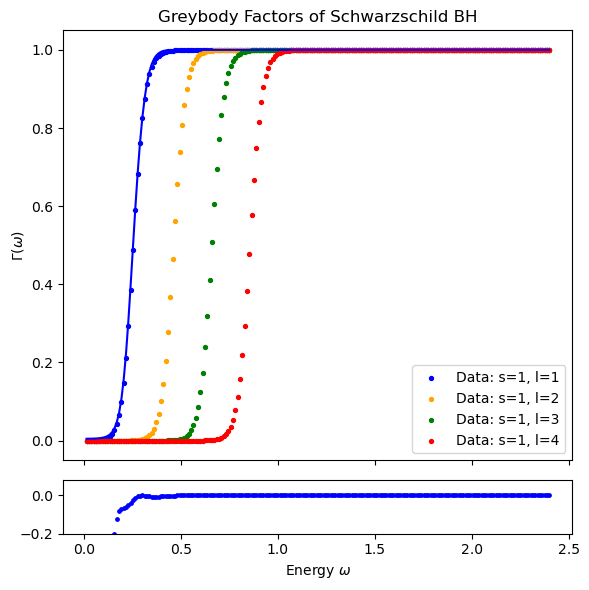

In [9]:
def PysrFit(x):
    y = erfc(erfc((x-0.204)/0.0955))
    # y = erf(erfc((0.603-x)/0.186)) 
    # y = np.tanh(x*(x-0.3)*10.15*x)
    return y
                
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [8,1]})

axs[0].plot(s10x, PysrFit(s10x), color='blue')
# axs[0].scatter(s10x, y1_noise, color='blue', marker='o', s=8)

axs[0].scatter(s10x, s10l0, color= 'blue', s=8, label='Data: s=1, l=1')
axs[0].scatter(s10x, s10l1, color= 'orange', s=8, label='Data: s=1, l=2')
axs[0].scatter(s10x, s10l2, color= 'green', s=8, label='Data: s=1, l=3')
axs[0].scatter(s10x, s10l3, color= 'red', s=8, label='Data: s=1, l=4')

axs[1].scatter(s10x, ((s10l0-PysrFit(s10x))/s10l0), color= 'blue', s=6)
# axs[1].scatter(s10x, (s10l1-PysrFit(s10x)), color= 'orange', s=6)
# axs[1].scatter(s10x, (s10l2-PysrFit(s10x)), color= 'green', s=6)
# axs[1].scatter(s10x, (s10l3-PysrFit(s10x)), color= 'red', s=6)
axs[1].set_ylim(-0.2, 0.08)

axs[1].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()

plt.tight_layout()
plt.show()

### One Variable Function $f(x_i)$ and Multiple outputs
For multiple outputs, multiple equations are returned. Here, we fit the (X, y1_noise, y2_noise, y3_noise, y4_noise)

In [10]:
# Learn equation
# We have define a Custom Operators for model.
model = PySRRegressor(niterations = 30, 
                      populations = 30,
                      binary_operators=["+", "-", "*", "/"],
                      unary_operators=["sin", "cos", "exp", "log", "erf", "erfc"],
                      complexity_of_operators={  # set custom complexities
                          "+": 1,
                          "-": 1,
                          "*": 2,
                          "/": 2,
                          "sin": 3, 
                          "cos": 3,
                          "exp": 3,
                          "log": 3,
                          "erf": 4,
                          "erfc": 4,
                          },
                      )

model.fit(X, y_noise)

/Users/yuangw/anaconda3/lib/python3.11/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.310e+05
Head worker occupation: 12.1%
Progress: 1492 / 3600 total iterations (41.444%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.114e-02  1.594e+01  y₀ = 0.89565
4           6.468e-02  7.559e-02  y₀ = sin(x₀)
5           4.996e-02  2.582e-01  y₀ = erf(x₀)
6           3.688e-02  3.034e-01  y₀ = sin(x₀) - -0.16671
7           1.129e-02  1.183e+00  y₀ = erf(x₀ + x₀)
8           1.047e-02  7.612e-02  y₀ = erf(x₀ * 2.2746)
10          5.585e-03  3.141e-01  y₀ = erf((-0.093473 + x₀) / 0.28519)
11          3.039e-03  6.087e-01  y₀ = erf(x₀ * (x₀ / 0.12542))
13          9.045e-04  6.059e-01  y₀ = erf(x₀ * (-2.4543 + (x₀ / 0.057688)))
15          6.411e-04  1.721e-01  y₀ = erf((((x₀ / 0.047358) + -3.9121) * x₀) - -0.12128)
16          4.249e-04  4.113e-01  y₀ = sin(erfc(((0.076488 / x₀) / x₀) - 0.79691))


PySRRegressor.equations_ = [
[
	    pick     score                                           equation  \
	0         0.000000                                          0.8956451   
	1         0.000063                          0.84709466 - -0.046212174   
	2         0.226652                                            sin(x0)   
	3         0.258192                                            erf(x0)   
	4         0.303424                              sin(x0) - -0.16671132   
	5         1.183447                                       erf(x0 + x0)   
	6         0.076115                                erf(x0 * 2.2746363)   
	7         0.315997                  erf((x0 / 0.291578) - 0.32307416)   
	8         0.604865                        erf(x0 * (x0 / 0.12542474))   
	9         0.606239        erf(((-0.14027068 + x0) / 0.05832409) * x0)   
	10  >>>>  1.034425          erf(erfc((0.29859185 - x0) / 0.09163254))   
	11        0.011556     erf(erfc((0.29859185 - sin(x0)) / 0.09163254))   
	12        0.015424  erf(erfc((0.3031223 - x0) / ((x0 + 1.0458429) ...   
	
	        loss  complexity  
	0   0.081141           1  
	1   0.081131           3  
	2   0.064677           4  
	3   0.049960           5  
	4   0.036885           6  
	5   0.011295           7  
	6   0.010467           8  
	7   0.005564          10  
	8   0.003039          11  
	9   0.000904          13  
	10  0.000321          14  
	11  0.000310          17  
	12  0.000301          19  
], [
	    pick     score                                           equation  \
	0         0.000000                                           0.715596   
	1         0.030377                             0.4011448 + 0.40858623   
	2         1.248082                                            sin(x0)   
	3         0.243677                                            erf(x0)   
	4         0.028879                             erf(x0) - -0.042258833   
	5         0.137594                                erf(1.2775855 * x0)   
	6         0.470117                        erf((x0 + x0) - 0.35601762)   
	7         0.255348                                erf(x0 * (x0 + x0))   
	8         0.189904                         erf((x0 * x0) * 2.5068238)   
	9         0.438104          erf(x0 * ((x0 / 0.17724732) - 1.5157939))   
	10        0.031194  erf(((x0 + -0.24498284) * (x0 + -0.12179948)) ...   
	11  >>>>  2.006724      erf(exp((log(x0) + 0.6860879) / 0.110840194))   
	12        0.104000         erf(exp(((log(x0) / x0) + 1.342972) / x0))   
	
	        loss  complexity  
	0   0.150321           1  
	1   0.141460           3  
	2   0.040607           4  
	3   0.031825           5  
	4   0.030039           7  
	5   0.026178           8  
	6   0.016359           9  
	7   0.012673          10  
	8   0.010481          11  
	9   0.004364          13  
	10  0.004100          15  
	11  0.000551          16  
	12  0.000403          19  
], [
	    pick     score                                           equation  \
	0         0.000000                                          0.5194097   
	1         0.104193                            0.35297084 + 0.37435618   
	2         1.429325                                            sin(x0)   
	3         0.051670                                            erf(x0)   
	4         0.230154                              sin(x0 + -0.15363397)   
	5         0.070166                               erf(x0 - 0.16571364)   
	6         0.459861                                       erf(x0 * x0)   
	7         0.011285                      erf(x0 * (x0 - -0.062879235))   
	8         0.103852                         erf((x0 * x0) * 1.2154392)   
	9         0.528229                 erf(x0 * ((x0 + x0) + -0.6120312))   
	10        0.282351          erf(x0 * ((x0 * 2.9801538) + -1.2419612))   
	11        0.410374                   erfc(erfc(x0 + x0) / 0.12741132)   
	12        0.958754           erfc(erfc((x0 + x0) + x0) / 0.011403452)   
	13  >>>>  0.523448    erfc(erfc((x0 + 2.3590558) * x0) / 0.011

In [11]:
model.sympy()

[erf(erfc((0.29859185 - x0)/0.09163254)),
 erf(487.789328362994*x0**9.02199792252258),
 erfc(erfc(x0*(x0 + 2.3590558))/0.011015651),
 erf(exp((x0 - 0.9007415)/0.053090993))]

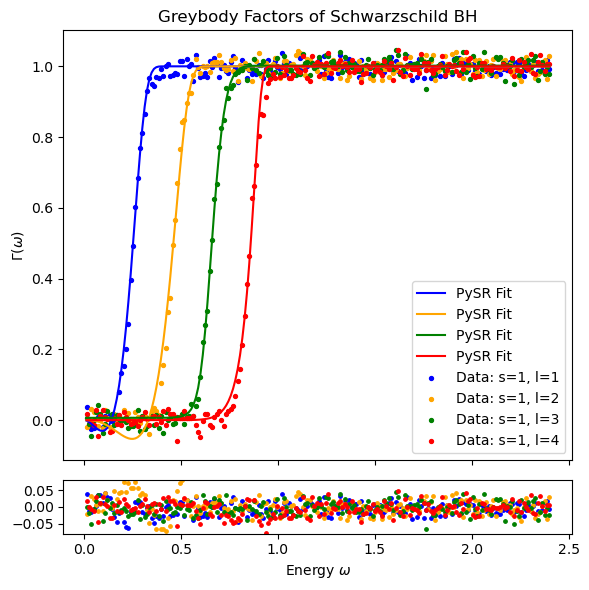

In [12]:
def PysrFit1(x0):   
    # y = erfc(erfc(x/0.3636)/0.11)
    return erf(x0*x0*(x0*66.655205 - 9.314816))

def PysrFit2(x0):
    # y = erfc(erfc(x*(x+0.733))/0.07)
    return erf((x0 - 0.33001128)*x0*37.565163*x0*x0)

def PysrFit3(x0):
    # y = erf(erfc((1.415-x)/0.18))
    return erfc(erfc((x0 - 0.60672057)/0.10386923)) + 0.0019207295

def PysrFit4(x0):
    # y = 0.5*(1+erf((x-1.71)/0.15))
    return erf(5.44260060779415*x0**16.055390841517)
                
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [8,1]})

axs[0].plot(s10x, PysrFit1(s10x), color='blue', label='PySR Fit')
axs[0].plot(s10x, PysrFit2(s10x), color='orange', label='PySR Fit')
axs[0].plot(s10x, PysrFit3(s10x), color='green', label='PySR Fit')
axs[0].plot(s10x, PysrFit4(s10x), color='red', label='PySR Fit')

axs[0].scatter(s10x, y_noise[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[0].scatter(s10x, y_noise[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[0].scatter(s10x, y_noise[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[0].scatter(s10x, y_noise[:, 3], color= 'red', s=8, label='Data: s=1, l=4')

axs[1].scatter(s10x, (y_noise[:, 0]-PysrFit1(s10x)), color= 'blue', s=6)
axs[1].scatter(s10x, (y_noise[:, 1]-PysrFit2(s10x)), color= 'orange', s=6)
axs[1].scatter(s10x, (y_noise[:, 2]-PysrFit3(s10x)), color= 'green', s=6)
axs[1].scatter(s10x, (y_noise[:, 3]-PysrFit4(s10x)), color= 'red', s=6)
axs[1].set_ylim(-0.08, 0.08)

axs[1].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()

plt.tight_layout()
plt.show()

### Two Variables' Function $f(x_i, y_i)$
1. Due to we have GBF's dataset (100, 4) with two variables: energy $\omega$ and quantum number $l$ (there may include more variables in our future questions), we could treat finding the universial analytical functions as a multivariables function $f(x_i, y_i, z_i, ...)$.
2. To find an analytical equation for $f(x_i, y_i)$ using $\underline{PySR}$, where $x_i$ is a continuous variable in the range (0, 2.5) with 100 points, and $y_i$ is a discrete positive integer (limited to $y\in [1,2,3,4]$), we need to set up the symbolic regression model to account for both the continuous and discrete variables
3. Since $y$ is a discrete variable, we could try to use some specail functions like `floor`, `ceil` or `round`.
4. PySR expects the input data (`input_data`) to have a shape of $(N, M)$, where $N$ is the number of samples (data points), and $M$ is the number of features (input variables). Hence the output data (`y_flat`) should have a shape of $(N,)$, representing the target variable for each corresponding input sample.

In [13]:
# Step 1: Generate sample data
l_values = np.array([1, 2, 3, 4])
x_grid, l_grid = np.meshgrid(s10x, l_values, indexing='ij')

# Step 2: Flatten the grid to create a dataset with shape (100*4, 2)
x_flat = x_grid.flatten()  # shape (400, )
l_flat = l_grid.flatten()  # shape (400, )
input_data = np.column_stack((x_flat, l_flat))  # Shape: (400, 2)

y_flat = y_noise.flatten()

print(np.shape(input_data), np.shape(y_noise), np.shape(y_flat))

# Step 4: Set up and run the PySR symbolic regression
SchGBF_model = PySRRegressor(
    niterations=500,
    binary_operators = ["+", "-", "*", "/"],
    unary_operators = ["sin", "cos", "exp", "log", "erf", "erfc"], # round/ceil/floor are Optional for discrete handling
    complexity_of_operators={"+": 1, "-": 1,"*": 2, "/": 2, "sin": 3, "cos": 3, "exp": 3, "log": 3, "erf": 4,"erfc": 4}, # set custom complexities
)

# Step 5: Fit the model
SchGBF_model.fit(input_data, y_flat)

(800, 2) (200, 4) (800,)


/Users/yuangw/anaconda3/lib/python3.11/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.030e+05
Head worker occupation: 8.8%
Progress: 717 / 7500 total iterations (9.560%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.365e+00  1.594e+01  y = -0.32749
3           1.646e-01  1.058e+00  y = 1.0495 + -0.28128
4           5.623e-02  1.074e+00  y = sin(x₀)
5           5.030e-02  1.114e-01  y = erf(x₀)
7           4.916e-02  1.146e-02  y = erf(x₀ + -0.055848)
8           4.910e-02  1.288e-03  y = sin(x₀ - 0.1319) - -0.085412
9           4.790e-02  2.458e-02  y = 0.051516 + erf(x₀ + -0.11515)
10          4.173e-02  1.381e-01  y = erf((x₀ + x₀) / x₁)
11          3.345e-02  2.209e-01  y = erf((2.6056 * x₀) / x₁)
12          2.702e-02  2.135e-01  y = erf((x₀ - (-3.5509 + x₁)) * x₀)
13          1.479e-02  6.027e-01  y = erf(exp(3.1315 - (x₁ / x₀)))
15          2.564e-03  8.762e-01  y = erf(exp(3.1315 - ((x₁ / x₀) - x₀)))
17  

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          0.7682634   
	1         0.358038                                            sin(x0)   
	2         0.111412                                            erf(x0)   
	3         0.011462                             erf(x0 + -0.055848375)   
	4         0.001289               sin(x0 + -0.13189884) - -0.085410826   
	5         0.024581                  erf(x0 - 0.11521387) + 0.05153123   
	6         0.138064                                erf((x0 + x0) / x1)   
	7         0.221094                         erf((x0 / x1) * 2.6233907)   
	8         0.223505                  erf(((3.4931386 - x1) + x0) * x0)   
	9         1.792146                    erf(exp(3.8230479 - (x1 / x0)))   
	10        0.296630              erf(exp(8.270204 - ((x1 + x1) / x0)))   
	11        0.091519              erf(exp((4.024317 - (x1 / x0)) / x0))   
	12        0.919194  erf(exp(9.234413 - (((x1 - -0.589627) + x1) / ...   
	13  >>>>  0.341651  erf(exp(((x0 / 0.05576051) - 1.8748295) - (x1 ...   
	14        0.042385  erf(exp(((4.672424 - (x1 / x0)) * x1) + (x0 - ...   
	
	        loss  complexity  
	0   0.164597           1  
	1   0.056226           4  
	2   0.050298           5  
	3   0.049158           7  
	4   0.049095           8  
	5   0.047903           9  
	6   0.041726          10  
	7   0.033449          11  
	8   0.026750          12  
	9   0.004457          13  
	10  0.002462          15  
	11  0.002247          16  
	12  0.000896          17  
	13  0.000637          18  
	14  0.000585          20  
]

In [14]:
SchGBF_model.sympy()


erf(exp(x0/0.05576051 - x1/0.27896923 - 1*1.8748295))

Let's comparing the `PySR` fitting function with the input data. However, up to now, the fitting function is unstable when I change `niterations`,`unary_operators` and `complexity_of_operators`. I think one reason is the shape of the data is too simple/short. Following are some posibile results:
$$\Gamma^{s=1}_{l} (\omega) = {\rm erf} [{\rm erfc}(-5.214*\omega + 2.09*l +1.1) ] \qquad{\rm PySR-Fitting1}$$
$$\Gamma^{s=1}_{l} (\omega) = {\rm erf} [{\rm erfc}(\frac{\omega/0.401 - (l+0.522)}{-0.48}) ] \qquad{\rm PySR-Fitting2}$$
$$\Gamma^{s=1}_{l} (\omega) = {\rm sin} [{\rm erfc}(\frac{-\omega/0.388 +l+0.638}{0.57}) ] \qquad{\rm PySR-Fitting3}$$
$$\Gamma^{s=1}_{l} (\omega) =\frac{1}{2} [ {\rm erf}(\frac{\omega-0.4*(l-1) - 0.51}{0.15}) + 1] \qquad {\rm Manual-Fitting}$$


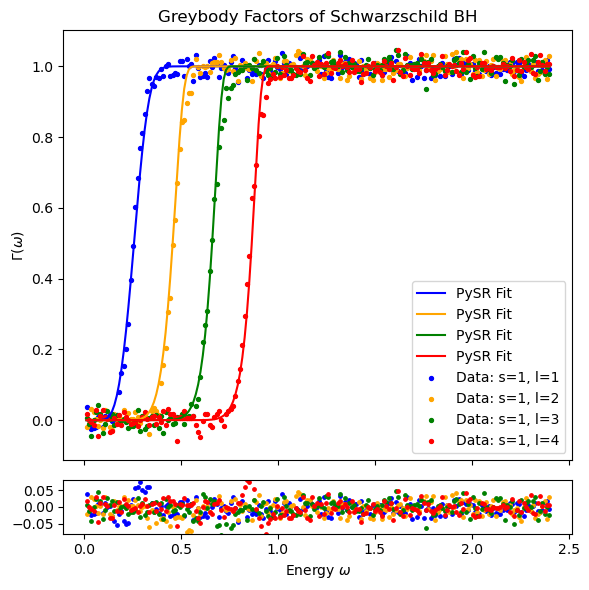

In [15]:
def PysrFitfull(x0, x1): # x0 is energy \omega, x1 is quantum number l
    term1 = x1*(4.87-x1/x0)-1.717
    term2 = erf(np.exp(term1))
    return term2

# def PysrFitfull(x0, x1): 
#     term1 = erfc(-5.214*x0 + 2.09*x1 +1.1)
#     term2 = erf(term1)
#     return term2

# def PysrFitfull(x0, x1):
#     term1 = -x0/0.388 +x1 +0.638
#     term2 = np.sin(erfc(term1/0.57))
#     return term2

fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [8,1]})

axs[0].plot(s10x, PysrFitfull(s10x, 1), color='blue', linestyle ='-',label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 2), color='orange', linestyle ='-', label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 3), color='green', linestyle ='-', label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 4), color='red', linestyle ='-', label='PySR Fit')

axs[0].scatter(s10x, y_noise[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[0].scatter(s10x, y_noise[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[0].scatter(s10x, y_noise[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[0].scatter(s10x, y_noise[:, 3], color= 'red', s=8, label='Data: s=1, l=4')

axs[1].scatter(s10x, (y_noise[:, 0]-PysrFitfull(s10x, 1)), color= 'blue', s=6)
axs[1].scatter(s10x, (y_noise[:, 1]-PysrFitfull(s10x, 2)), color= 'orange', s=6)
axs[1].scatter(s10x, (y_noise[:, 2]-PysrFitfull(s10x, 3)), color= 'green', s=6)
axs[1].scatter(s10x, (y_noise[:, 3]-PysrFitfull(s10x, 4)), color= 'red', s=6)
axs[1].set_ylim(-0.08, 0.08)

axs[1].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()

plt.tight_layout()
plt.show()

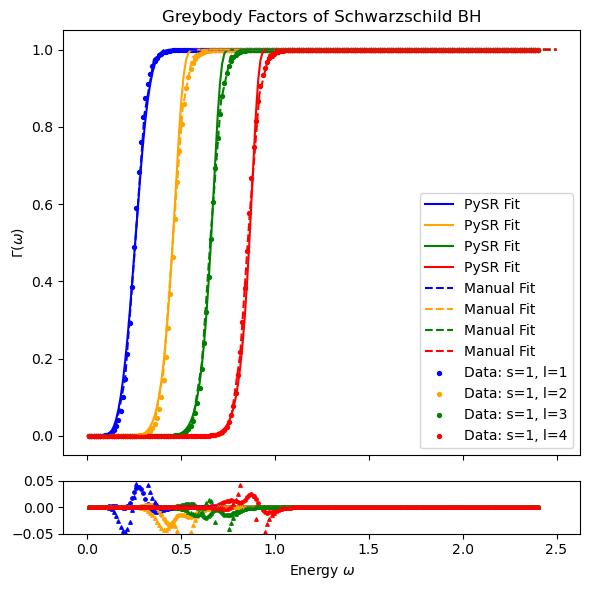

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [8,1]})

axs[0].plot(s10x, PysrFitfull(s10x, 1), color='blue', linestyle ='-',label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 2), color='orange', linestyle ='-', label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 3), color='green', linestyle ='-', label='PySR Fit')
axs[0].plot(s10x, PysrFitfull(s10x, 4), color='red', linestyle ='-', label='PySR Fit')

axs[0].plot(xfit, ManualFit(xfit, 1), color='blue', linestyle ='--', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 2), color='orange', linestyle ='--', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 3), color='green', linestyle ='--', label='Manual Fit')
axs[0].plot(xfit, ManualFit(xfit, 4), color='red', linestyle ='--', label='Manual Fit')

axs[0].scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[0].scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[0].scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[0].scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')

axs[1].scatter(s10x, (s10_array[:, 0]-ManualFit(s10x, 1)), marker='o', color= 'blue', s=6)
axs[1].scatter(s10x, (s10_array[:, 1]-ManualFit(s10x, 2)), marker='o', color= 'orange', s=6)
axs[1].scatter(s10x, (s10_array[:, 2]-ManualFit(s10x, 3)), marker='o', color= 'green', s=6)
axs[1].scatter(s10x, (s10_array[:, 3]-ManualFit(s10x, 4)), marker='o', color= 'red', s=6)

axs[1].scatter(s10x, (s10_array[:, 0]-PysrFitfull(s10x, 1)), marker='^', color= 'blue', s=6)
axs[1].scatter(s10x, (s10_array[:, 1]-PysrFitfull(s10x, 2)), marker='^', color= 'orange', s=6)
axs[1].scatter(s10x, (s10_array[:, 2]-PysrFitfull(s10x, 3)), marker='^', color= 'green', s=6)
axs[1].scatter(s10x, (s10_array[:, 3]-PysrFitfull(s10x, 4)), marker='^', color= 'red', s=6)
axs[1].set_ylim(-0.05, 0.05)

axs[1].set_xlabel("Energy $\omega$")
axs[0].set_ylabel("$\Gamma (\omega)$")
axs[0].set_title("Greybody Factors of Schwarzschild BH")
axs[0].legend()

plt.tight_layout()
plt.show()

### Using scipy.optimize to fit Function $f(x_i)$
Here, we try to fit the data with $f(x) = {\rm erf} (ax^3 + bx^2 + cx)$, and the fitted parameters: a = 10.979, b = -4.671, c = 0.451

Fitted parameters: a = -12.916, b = 4.468, d = 3.499


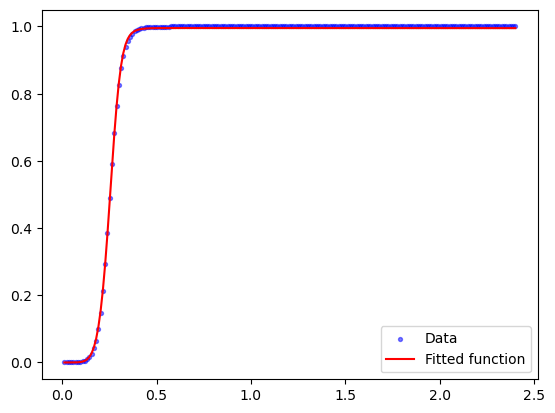

In [17]:
from scipy.optimize import curve_fit
# def fit_function0(x, a, b, c, d):
#     return erf(erfc(a * x**3 + b * x**2 + c * x + d))

def fit_function0(x, a, b, d):
    return erf(erfc(a*x + b*x**2 + d))

#The p0 parameter provides initial guesses for the parameters (a, b, c)
popt, pcov = curve_fit(fit_function0, s10x, s10l0, p0=[-10, 5, 3.5])

a_fit, b_fit, d_fit = popt
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}, d = {d_fit:.3f}")

plt.scatter(s10x, s10l0, label='Data', color='blue', alpha=0.5, s=8)
plt.plot(s10x, fit_function0(s10x, *popt), label='Fitted function', color='red')
plt.legend()
plt.show()

In [18]:
# Step 1: data
l_values = np.array([1, 2, 3, 4])
x_grid, l_grid = np.meshgrid(s10x, l_values, indexing='ij')

# Step 2: Flatten the grid to create a dataset with shape (100*4, 2)
x_flat = x_grid.flatten()  # shape (400, )
l_flat = l_grid.flatten()  # shape (400, )
input_data = np.column_stack((x_flat, l_flat))  # Shape: (400, 2)

# y_flat = y_noise.flatten()
y_flat = s10_array.flatten()

print(np.shape(input_data), np.shape(s10_array), np.shape(y_flat))

def fit_function1(data, a, d, e):
    x, y = data
    return erf(erfc(a*x + d + e*y))

def fit_function2(data, a, b, d, e):
    x, y = data
    return erf(erfc(a*x + b*x**2 + d + e*y))

def fit_function3(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a*x + b*x**2  + c*x**3 + d + e*y))

popt1, pcov1 = curve_fit(fit_function1, (x_flat, l_flat), y_flat, p0=[-5.146, 0.957, 2.065])
popt2, pcov2 = curve_fit(fit_function2, (x_flat, l_flat), y_flat, p0=[-4.853, -0.138, 0.957, 2.065])
popt3, pcov3 = curve_fit(fit_function3, (x_flat, l_flat), y_flat, p0=[-4.760, -0.240, 0.031, 0.928, 2.068])

# Extract fitted parameters
a_fit1, d_fit1, e_fit1 = popt1
print(f"Fitted function1 parameters: a = {a_fit1:.3f}, d = {d_fit1:.3f}, e = {e_fit1:.3f}")
a_fit2, b_fit2, d_fit2, e_fit2 = popt2
print(f"Fitted function1 parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, d = {d_fit2:.3f}, e = {e_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3, e_fit3 = popt3
print(f"Fitted function1 parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}, e = {e_fit3:.3f}")


(800, 2) (200, 4) (800,)
Fitted function1 parameters: a = -10.293, d = 1.097, e = 2.059
Fitted function1 parameters: a = -9.707, b = -0.554, d = 0.957, e = 2.065
Fitted function1 parameters: a = -9.523, b = -0.955, c = 0.242, d = 0.928, e = 2.068


the results of scipy.optimize (a python package based on least-squares minimization $\chi^2$) is very close to the PySR:
$$\Gamma^{s=1}_{l} (\omega) = {\rm erf} [{\rm erfc}(-5.214*\omega + 2.09*l +1.1) ] \qquad{\rm PySR-Fitting1}$$
$$\Gamma^{s=1}_{l} (\omega) = {\rm erf} [{\rm erfc}(-5.146*\omega + 2.059*l +1.097) ] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=1}_{l} (\omega) =\frac{1}{2} [ {\rm erf}(\frac{\omega-0.4*(l-1) - 0.51}{0.15}) + 1] =\frac{1}{2} [ {\rm erf}(6.67* \omega - 2.67*l -0.73) + 1] 
\qquad {\rm Manual-Fitting}$$
$$\Gamma^{s=1}_{l} (\omega) =\frac{1}{2} [ {\rm erf}(6.923*\omega - 2.77*l - 0.79) + 1] \qquad{\rm scipy.optimize}$$

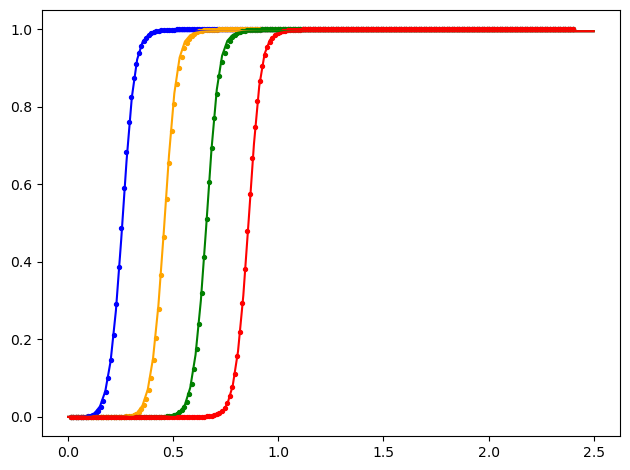

In [19]:
def fit_function1(x, y):
    a = -10.293 
    d = 1.097 
    e = 2.059
    return erf(erfc(a*x + d + e*y))

def fit_function2(x, y):
    a = -9.707
    b = -0.554
    d = 0.957 
    e = 2.065
    return erf(erfc(a*x + b*x**2 + d + e*y))

def fit_function3(x, y):
    a = -9.523 
    b = -0.955
    c = 0.242
    d = 0.928 
    e = 2.068
    return erf(erfc(a*x + b*x**2  + c*x**3 + d + e*y))

xxx = np.linspace(0, 2.5, 100)

plt.plot(xxx, fit_function1(xxx, 1), color= 'blue')
plt.plot(xxx, fit_function1(xxx, 2), color= 'orange')
plt.plot(xxx, fit_function1(xxx, 3), color= 'green')
plt.plot(xxx, fit_function1(xxx, 4), color= 'red')

plt.scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
plt.scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
plt.scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
plt.scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')

plt.tight_layout()
plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=1}_{l=1/2/3/4}$
Here, we try to fit the data of $\Gamma^{s=1}_{l=1/2/3/4}$ with 
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega) = {\rm erf} [{\rm erfc} (\alpha\omega + \beta \omega^2 + \gamma\omega + \delta + \epsilon l)] \qquad{{\rm w/wo} \quad \beta, \gamma}$$ 
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega) =\frac{1}{2} [ {\rm erf}(\alpha\omega + \beta l + \gamma) + 1] \qquad{\rm scipy.optimize}$$

In [20]:
GBF_10_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=1.txt")
GBF_10_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=2.txt")
GBF_10_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=3.txt")
GBF_10_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=4.txt")
s10x, s10l0, s10l1, s10l2, s10l3 = GBF_10_10[:, 0], GBF_10_10[:, 1], GBF_10_20[:, 1], GBF_10_30[:, 1], GBF_10_40[:, 1]
np.savetxt("multispin/GBF_s=10.txt", np.c_[s10x, s10l0, s10l1, s10l2, s10l3])
s10_array = np.column_stack((s10l0, s10l1, s10l2, s10l3)) 

# Step 1: data
l_value1 = np.array([1, 2, 3, 4])
x_grid, l_grid = np.meshgrid(s10x, l_value1, indexing='ij')

# Step 2: Flatten the grid to create a dataset with shape (100*4, 2)
x_flat = x_grid.flatten()  # shape (400, )
l_flat = l_grid.flatten()  # shape (400, )
input_data = np.column_stack((x_flat, l_flat))  # Shape: (400, 2)

y_flat = s10_array.flatten()

print(np.shape(input_data), np.shape(s10_array), np.shape(y_flat))

def fit_function101(data, a, d, e):
    x, y = data
    return erf(erfc(a*x + d + e*y))

def fit_function102(data, a, b, d, e):
    x, y = data
    return erf(erfc(a*x + b*x**2 + d + e*y))

def fit_function103(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a*x + b*x**2  + c*x**3 + d + e*y))

def fit_function104(data, a, b, c):
    x, y = data
    return 0.5*(erf(a*x + b*y + c) + 1)

popt1, _ = curve_fit(fit_function101, (x_flat, l_flat), y_flat, p0=[-5.146, 0.957, 2.065])
popt2, _ = curve_fit(fit_function102, (x_flat, l_flat), y_flat, p0=[-4.853, -0.138, 0.957, 2.065])
popt3, _ = curve_fit(fit_function103, (x_flat, l_flat), y_flat, p0=[-4.760, -0.240, 0.031, 0.928, 2.068])
popt4, _ = curve_fit(fit_function104, (x_flat, l_flat), y_flat, p0=[6.923, -2.770, -0.790])

# Extract fitted parameters
a_fit1, d_fit1, e_fit1 = popt1
print(f"Fitted erf[erfc(a*x + d + e*y)] parameters: a = {a_fit1:.3f}, d = {d_fit1:.3f}, e = {e_fit1:.3f}")
a_fit2, b_fit2, d_fit2, e_fit2 = popt2
print(f"Fitted erf[erfc(a*x + b*x^2 + d + e*y)] parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, d = {d_fit2:.3f}, e = {e_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3, e_fit3 = popt3
print(f"Fitted erf[erfc(a*x + b*x^2 + c*x^3 + d + e*y)] parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}, e = {e_fit3:.3f}")
a_fit4, b_fit4, c_fit4 = popt4
print(f"Fitted 0.5* (erf(a*x + b*y + c) + 1) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}")

(800, 2) (200, 4) (800,)
Fitted erf[erfc(a*x + d + e*y)] parameters: a = -10.293, d = 1.097, e = 2.059
Fitted erf[erfc(a*x + b*x^2 + d + e*y)] parameters: a = -9.707, b = -0.554, d = 0.957, e = 2.065
Fitted erf[erfc(a*x + b*x^2 + c*x^3 + d + e*y)] parameters: a = -9.523, b = -0.955, c = 0.242, d = 0.928, e = 2.068
Fitted 0.5* (erf(a*x + b*y + c) + 1) parameters: a = 13.847, b = -2.770, c = -0.790


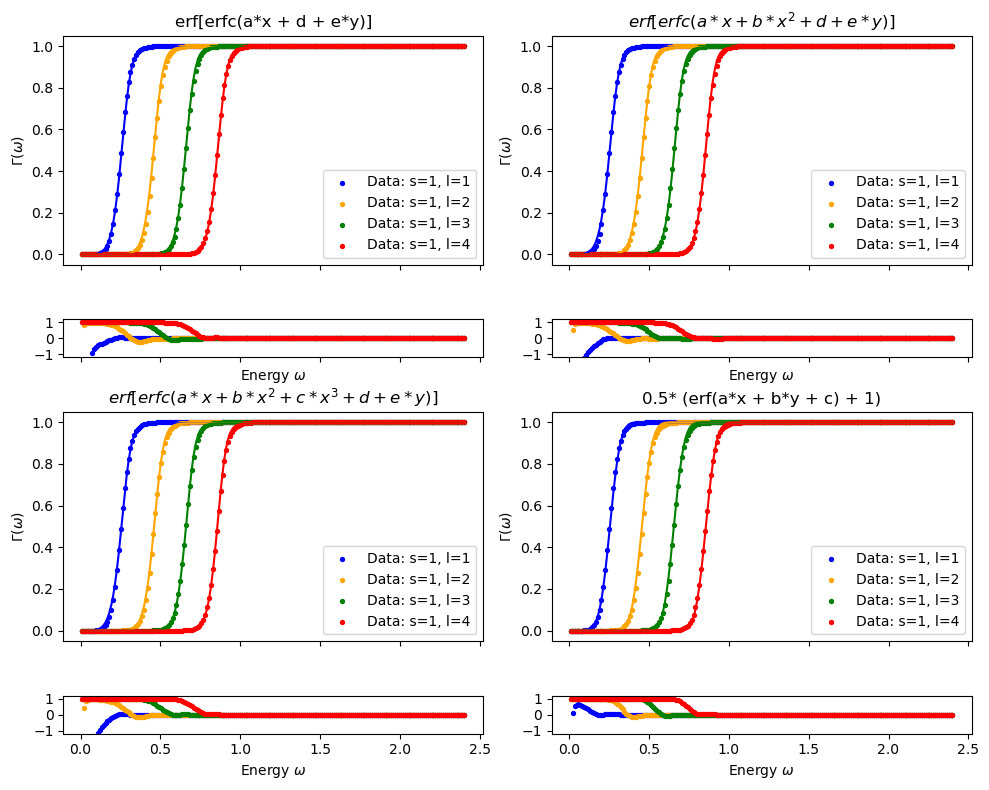

In [21]:
def fit_function1(x, y):
    a = -10.293
    d = 1.097 
    e = 2.059
    return erf(erfc(a*x + d + e*y))

def fit_function2(x, y):
    a = -9.707
    b = -0.554
    d = 0.957 
    e = 2.065
    return erf(erfc(a*x + b*x**2 + d + e*y))

def fit_function3(x, y):
    a = -9.523 
    b = -0.955 
    c = 0.242
    d = 0.928 
    e = 2.068
    return erf(erfc(a*x + b*x**2  + c*x**3 + d + e*y))


def fit_function4(x, y):
    a = 13.847 
    b = -2.770 
    c = -0.790
    return 0.5* (erf(a*x + b*y + c) + 1)

fig, axs = plt.subplots(4, 2, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [6, 1]*2})

axs[0, 0].plot(s10x, fit_function1(s10x, 1), color= 'blue')
axs[0, 0].plot(s10x, fit_function1(s10x, 2), color= 'orange')
axs[0, 0].plot(s10x, fit_function1(s10x, 3), color= 'green')
axs[0, 0].plot(s10x, fit_function1(s10x, 4), color= 'red')
axs[0, 0].scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[0, 0].scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[0, 0].scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[0, 0].scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')
axs[0, 0].set_title('erf[erfc(a*x + d + e*y)]')
axs[1, 0].set_xlabel("Energy $\omega$")
axs[0, 0].set_ylabel("$\Gamma (\omega)$")
axs[0, 0].legend(loc = 'lower right')
axs[1, 0].scatter(s10x, (s10_array[:, 0]-fit_function1(s10x, 1))/s10_array[:, 0], color= 'blue', s=8)
axs[1, 0].scatter(s10x, (s10_array[:, 1]-fit_function1(s10x, 2))/s10_array[:, 1], color= 'orange', s=8)
axs[1, 0].scatter(s10x, (s10_array[:, 2]-fit_function1(s10x, 3))/s10_array[:, 2], color= 'green', s=8)
axs[1, 0].scatter(s10x, (s10_array[:, 3]-fit_function1(s10x, 4))/s10_array[:, 3], color= 'red', s=8)
axs[1, 0].set_ylim(-1.2, 1.2)


axs[0, 1].plot(s10x, fit_function2(s10x, 1), color= 'blue')
axs[0, 1].plot(s10x, fit_function2(s10x, 2), color= 'orange')
axs[0, 1].plot(s10x, fit_function2(s10x, 3), color= 'green')
axs[0, 1].plot(s10x, fit_function2(s10x, 4), color= 'red')
axs[0, 1].scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[0, 1].scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[0, 1].scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[0, 1].scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')
axs[0, 1].set_title('$erf[erfc(a*x + b*x^2 + d + e*y)]$')
axs[1, 1].set_xlabel("Energy $\omega$")
axs[0, 1].set_ylabel("$\Gamma (\omega)$")
axs[0, 1].legend(loc = 'lower right')
axs[1, 1].scatter(s10x, (s10_array[:, 0]-fit_function2(s10x, 1))/s10_array[:, 0], color= 'blue', s=8)
axs[1, 1].scatter(s10x, (s10_array[:, 1]-fit_function2(s10x, 2))/s10_array[:, 1], color= 'orange', s=8)
axs[1, 1].scatter(s10x, (s10_array[:, 2]-fit_function2(s10x, 3))/s10_array[:, 2], color= 'green', s=8)
axs[1, 1].scatter(s10x, (s10_array[:, 3]-fit_function2(s10x, 4))/s10_array[:, 3], color= 'red', s=8)
axs[1, 1].set_ylim(-1.2, 1.2)


axs[2, 0].plot(s10x, fit_function3(s10x, 1), color= 'blue')
axs[2, 0].plot(s10x, fit_function3(s10x, 2), color= 'orange')
axs[2, 0].plot(s10x, fit_function3(s10x, 3), color= 'green')
axs[2, 0].plot(s10x, fit_function3(s10x, 4), color= 'red')
axs[2, 0].scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[2, 0].scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[2, 0].scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[2, 0].scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')
axs[2, 0].set_title('$erf[erfc(a*x + b*x^2 + c*x^3 + d + e*y)]$')
axs[3, 0].set_xlabel("Energy $\omega$")
axs[2, 0].set_ylabel("$\Gamma (\omega)$")
axs[2, 0].legend(loc = 'lower right')
axs[3, 0].scatter(s10x, (s10_array[:, 0]-fit_function3(s10x, 1))/s10_array[:, 0], color= 'blue', s=8)
axs[3, 0].scatter(s10x, (s10_array[:, 1]-fit_function3(s10x, 2))/s10_array[:, 1], color= 'orange', s=8)
axs[3, 0].scatter(s10x, (s10_array[:, 2]-fit_function3(s10x, 3))/s10_array[:, 2], color= 'green', s=8)
axs[3, 0].scatter(s10x, (s10_array[:, 3]-fit_function3(s10x, 4))/s10_array[:, 3], color= 'red', s=8)
axs[3, 0].set_ylim(-1.2, 1.2)


axs[2, 1].plot(s10x, fit_function4(s10x, 1), color= 'blue')
axs[2, 1].plot(s10x, fit_function4(s10x, 2), color= 'orange')
axs[2, 1].plot(s10x, fit_function4(s10x, 3), color= 'green')
axs[2, 1].plot(s10x, fit_function4(s10x, 4), color= 'red')
axs[2, 1].scatter(s10x, s10_array[:, 0], color= 'blue', s=8, label='Data: s=1, l=1')
axs[2, 1].scatter(s10x, s10_array[:, 1], color= 'orange', s=8, label='Data: s=1, l=2')
axs[2, 1].scatter(s10x, s10_array[:, 2], color= 'green', s=8, label='Data: s=1, l=3')
axs[2, 1].scatter(s10x, s10_array[:, 3], color= 'red', s=8, label='Data: s=1, l=4')
axs[2, 1].set_title('0.5* (erf(a*x + b*y + c) + 1)')
axs[3, 1].set_xlabel("Energy $\omega$")
axs[2, 1].set_ylabel("$\Gamma (\omega)$")
axs[2, 1].legend(loc = 'lower right')
axs[3, 1].scatter(s10x, (s10_array[:, 0]-fit_function4(s10x, 1))/s10_array[:, 0], color= 'blue', s=8)
axs[3, 1].scatter(s10x, (s10_array[:, 1]-fit_function4(s10x, 2))/s10_array[:, 1], color= 'orange', s=8)
axs[3, 1].scatter(s10x, (s10_array[:, 2]-fit_function4(s10x, 3))/s10_array[:, 2], color= 'green', s=8)
axs[3, 1].scatter(s10x, (s10_array[:, 3]-fit_function4(s10x, 4))/s10_array[:, 3], color= 'red', s=8)
axs[3, 1].set_ylim(-1.2, 1.2)

plt.tight_layout(h_pad=0.1)
plt.show()